In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

D. Regression

Q7) Predict Home prices employing multiple regression. Compare performance with a KNN  Regressor model used for prediction. Draw a residual plot for these predictions and offer your comments. 

In [4]:
house_df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/house.csv')
house_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
house_df.columns[house_df.isna().any()]

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

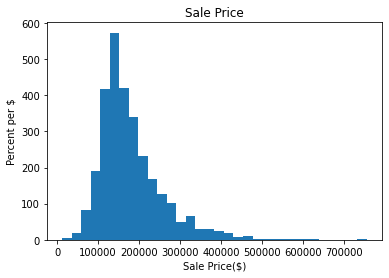

In [6]:
plt.hist(house_df['SalePrice'], bins=32)
plt.title('Sale Price')
plt.xlabel('Sale Price($)')
plt.ylabel('Percent per $')
plt.show()

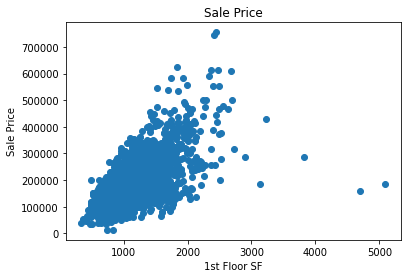

In [7]:
plt.scatter(house_df['1st Flr SF'], house_df['SalePrice'])
plt.title('Sale Price')
plt.xlabel('1st Floor SF')
plt.ylabel('Sale Price')
plt.show()

In [8]:
house_df.corr().abs().unstack().drop_duplicates().sort_values(ascending=False)

Order           Order             1.000000
                Yr Sold           0.975993
Garage Cars     Garage Area       0.889676
Year Built      Garage Yr Blt     0.834849
Gr Liv Area     TotRms AbvGrd     0.807772
                                    ...   
Enclosed Porch  Yr Sold           0.000505
Order           2nd Flr SF        0.000417
MS SubClass     Mo Sold           0.000350
Mas Vnr Area    Mo Sold           0.000276
Fireplaces      Enclosed Porch    0.000250
Length: 742, dtype: float64

In [9]:
house_df['Garage Area'].fillna(house_df['Garage Area'].mean(), inplace=True)

In [10]:
house_df['Total Bsmt SF'].fillna(house_df['Total Bsmt SF'].mean(), inplace=True)

In [11]:
house_df['Garage Area'].isna().any(), house_df['Total Bsmt SF'].isna().any()

(False, False)

In [12]:
inputs = house_df.loc[:, ['1st Flr SF', '2nd Flr SF', 'Garage Area', 'Total Bsmt SF', 'Wood Deck SF', 'Open Porch SF', 'Lot Area', 'Year Built', 'Yr Sold']]
inputs.head()

,1st Flr SF,2nd Flr SF,Garage Area,Total Bsmt SF,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
0,1656,0,528.0,1080.0,210,62,31770,1960,2010
1,896,0,730.0,882.0,140,0,11622,1961,2010
2,1329,0,312.0,1329.0,393,36,14267,1958,2010
3,2110,0,522.0,2110.0,0,0,11160,1968,2010
4,928,701,482.0,928.0,212,34,13830,1997,2010


In [13]:
target = house_df['SalePrice']
target.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3)

In [15]:
lm = LinearRegression(fit_intercept=True)

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
print(lm.intercept_) 

-284188.5535156558


In [18]:
coeff_df = pd.DataFrame(lm.coef_, inputs.columns, columns=['Coefficient'])
coeff_df

,Coefficient
1st Flr SF,71.800283
2nd Flr SF,70.268313
Garage Area,62.675060
Total Bsmt SF,37.158057
Wood Deck SF,36.633910
Open Porch SF,26.905754
Lot Area,0.231717
Year Built,714.025483
Yr Sold,-560.656357


In [19]:
lm_pred = lm.predict(X_test)

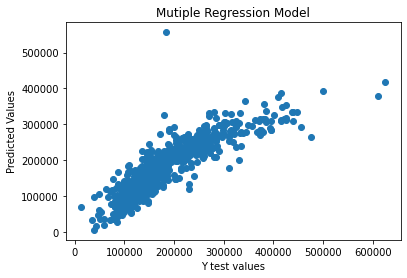

In [20]:
plt.scatter(y_test, lm_pred)
plt.title('Mutiple Regression Model')
plt.xlabel('Y test values')
plt.ylabel('Predicted Values')
plt.show()

In [21]:
from statsmodels.formula.api import ols
reg = ols("SalePrice ~ Q('1st Flr SF') + Q('2nd Flr SF') + Q('Garage Area') + Q('Total Bsmt SF') + Q('Wood Deck SF') + Q('Open Porch SF') + Q('Lot Area') + Q('Year Built') + Q('Yr Sold')", data=house_df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     908.7
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:56:51   Log-Likelihood:                -35276.
No. Observations:                2930   AIC:                         7.057e+04
Df Residuals:                    2920   BIC:                         7.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.227e+05   1.16

Text(0.5, 1.0, 'Homoscedasticity')

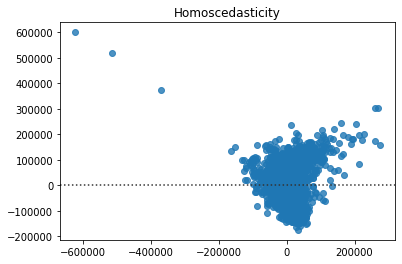

In [22]:
pred_val = reg.fittedvalues.copy()
true_val = house_df['SalePrice'].values.copy()
residuals = true_val - pred_val
sns.residplot(x=residuals, y=pred_val)
plt.title('Homoscedasticity')

In [23]:
from sklearn import metrics
print(f'MAE: {metrics.mean_absolute_error(y_test, lm_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, lm_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lm_pred))}')

MAE: 25602.209301264204
MSE: 1481265654.9823678
RMSE: 38487.21417539035


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=15)

In [29]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [30]:
knn_model.score(X_test, y_test)

0.007963594994311717

In [31]:
knn_pred = knn_model.predict(X_test)

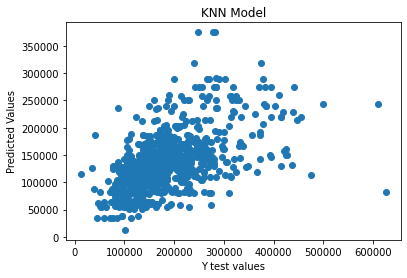

In [32]:
plt.scatter(y_test, knn_pred)
plt.title('KNN Model')
plt.xlabel('Y test values')
plt.ylabel('Predicted Values')
plt.show()

In [33]:
print(f'MAE: {metrics.mean_absolute_error(y_test, lm_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, lm_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, lm_pred))}')

MAE: 25602.209301264204
MSE: 1481265654.9823678
RMSE: 38487.21417539035


Multiple Regression model performed better in comparison to KNN for the given regression task.

Q8) Implement a logistic regression model – employ scikit-learn library functions. 

In [34]:
train = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/test.csv")

In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
train.shape, test.shape

((891, 12), (418, 11))

In [38]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


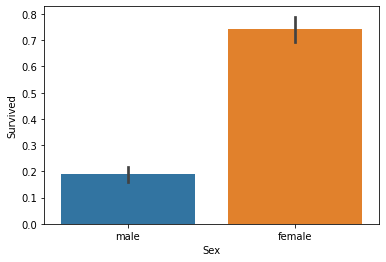

In [39]:
sns.barplot(x="Sex", y="Survived", data=train)

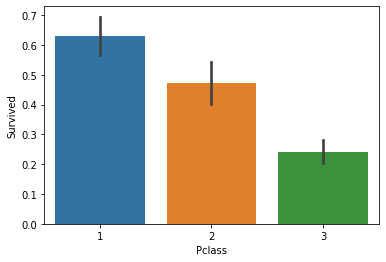

In [40]:
sns.barplot(x="Pclass", y="Survived", data=train)

In [41]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())
train = train.fillna({"Embarked": "S"})

In [42]:
train = train.drop(['Name', 'Cabin', 'Ticket'], axis = 1)
test = test.drop(['Name', 'Cabin', 'Ticket'], axis = 1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex_n'] = le.fit_transform(train['Sex'])
test['Sex_n'] = le.fit_transform(test['Sex'])

In [44]:
train['Embarked_n'] = le.fit_transform(train['Embarked'])
test['Embarked_n'] = le.fit_transform(test['Embarked'])

In [45]:
train = train.drop(['Fare', 'Sex', 'Embarked', 'PassengerId'], axis = 1)
test = test.drop(['Fare', 'Sex', 'Embarked'], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_n,Embarked_n
0,0,3,22.0,1,0,1,2
1,1,1,38.0,1,0,0,0
2,1,3,26.0,0,0,0,2
3,1,1,35.0,1,0,0,2
4,0,3,35.0,0,0,1,2


In [46]:
inputs = train.drop(['Survived'], axis=1)
inputs.head()

,Pclass,Age,SibSp,Parch,Sex_n,Embarked_n
0,3,22.0,1,0,1,2
1,1,38.0,1,0,0,0
2,3,26.0,0,0,0,2
3,1,35.0,1,0,0,2
4,3,35.0,0,0,1,2


In [47]:
target = train["Survived"]
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.25)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.score(X_test, y_test)

0.7757847533632287

In [54]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       131
           1       0.78      0.64      0.70        92

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.76       223
weighted avg       0.78      0.78      0.77       223



In [56]:
from sklearn.metrics import confusion_matrix
cm_titanic = confusion_matrix(y_test, y_pred)
cm_titanic

array([[114,  17],
       [ 33,  59]])

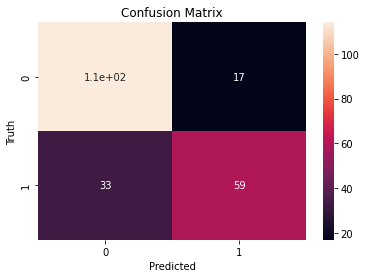

In [57]:
sns.heatmap(cm_titanic, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()